# Lab 11: ODEs, Failure Rates, and Evolutionary Games

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
from scipy.integrate import odeint
print ('Modules Imported!')

Modules Imported!


In this lab we're to going analyze evolutionary games using drift analysis. In order to do this, we first need to determine how to integrate ordinary differential equations. So, we begin with a brief exposure of how to achieve this in Python. While we're at it, we'll do a short exercise about failure rate functions.  Then we examine some evolutionary games, using both a stochastic model and a deterministic model, which involves the differential equations.

## Integration of ODEs

This section gives an introdution to integrating ordinary differential equations (odes), with an application to the calculation of a CDF from a failure rate function.  If you recall from your math classes we can describe an ODE as the following:

$\dot{y}=f(y),$ 

where both $y$ and the function $f$ are vector valued, and $\dot{y}$ is shorthand for $\frac{dy}{dt}.$   The variables being vector valued simply implies that we could have a system of dependent one dimensional (1D) ODEs as opposed to just a single one dimensional variable.  Let's look at the following system:

\begin{eqnarray*}
\binom{\dot{y_0}}{\dot{y_1}} = \binom{2y_1-0.1y_0}{-y_0}
\end{eqnarray*}
with the initial condition $y_{init}=\binom{y_1(0)}{y_2(0)}=\binom{1}{1}.$

Our goal in using Python is not to find a closed form solution to the ODE as you would have probably done in your math class, but to numerically integrate it and produce a graphical solution. In order to do this we use the odeint method from scipy.integrate. It takes a function with an initial value and specified times at which the solution is to be output. Internally, the numerical method will often use a much finer grid of time points to solve the ode -- but that is none of your concern.   The times you put in are the times at with the method needs to provide the values of the solution. Look how it is used below:

Text(0.5,0,'y_0')

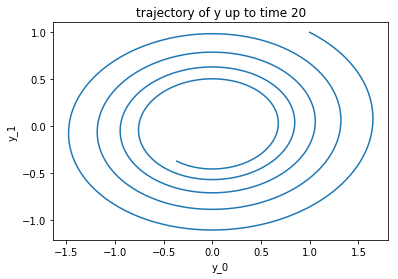

In [2]:
# Simple example integrating a 2d ordinary differential equation (ode) dy/dt=f(y,t) 
# Note that the odeint package is imported in the code at the beginning of this file.

# Function to integrate over
def f(y,t):    
    return np.array([2.*y[1]-.1*y[0],-y[0] ])

time=np.linspace(0.0,20.0,10000)   # The times at which the solution is output.
yinit=np.array([1.0,1.0])   # The initial condition
y=odeint(f,yinit,time)      

plt.plot(y[:,0],y[:,1])
plt.title('trajectory of y up to time 20')
plt.ylabel('y_1')
plt.xlabel('y_0')


Typically in a plot like this you would add an arrow to indicate the direction of time in the graph. However, we know the initial state is $y_{init}=\binom{1}{1}.$ So as time increases, the trajectory moves concentrically inwards in a clockwise fashion. Depending on how much of differential equations you remember, this solution should make sense. The equation happens to have a linear form and can be written as $\dot y = Ay$ where
$
A=\left( \begin{array}{cc}  -0.1  &  2  \\  -1  & 0 \end{array} \right).
$
The eigenvalues of $A$ are complex with negative real parts, so we would expect a decaying oscillatory behavior. (If you didn't follow that, don't worry about it.)

As a simple application of integrating a 1D (one-dimensional) ode, the following code calculates a CDF $F$ from its failure rate function $h.$ But first, let's look at some theory to remember what a failure rate function is. If we let $T$ be a positive random variable with a pdf $f_T$ then
the failure rate function is defined by the following:

$$h(t)=\lim_{\epsilon \to 0} \frac{P(t<T \leq t+\epsilon | T>t)}{\epsilon}$$

Equivalently, an object having failure rate function $h$ means that for any $t > 0,$ given
that the object is still working at time $t$, the probability it will fail in the next
$\epsilon$ time units is $h(t)\epsilon + o(\epsilon)$.  (As usual, $o(\epsilon)$ represents an error term such that $o(\epsilon)/\epsilon \to 0$ as $\epsilon\to 0.$)  With a little bit more derivation (shown in Section 3.9 of your ECE 313 text), we can see that:

$$h(t) = \frac{f_T(t)}{1-F_T(t)}$$

Of course, the pdf $f_T$ is the derivative of the CDF $F_T$. Here's where your 1D ODE comes into play. Given a failure rate function, we want to be able to calculate the CDF. We can easily turn this into an ODE. 

$f_T(t) = (1-F_T(t))h(t)$

Let $F_T(t) = y$ and  $f_T(t) = \frac{dy}{dt} = \dot{y}$, then:

$\dot{y} = (1-y)h(t)$

Now we have our differential equation set up and we can solve it by the same method used in the previous example. For the code below, we define a particular bathtub shaped failure rate function to model the lifetime of a component such as a hard disk drive. There is a high, but decreasing initial rate of failure, followed be a period with a very low rate failure, followed by an increasing rate of failure. You should be able to think of reasons why an object might exhibit this type of failure rate function. Notice that the CDF behaves as we would expect: always between 0 and 1, and reactive to $h(t)$.

If you examine the ECE 313 notes you'll see another way to determine $F_T,$  namely, using
$F_T(t) = 1- \exp \left( \int_o^t -h(s) ds \right)$.  The point here, though, is to get some practice using
odeint, instead of using this formula.

Text(0.5,0,'$t$')

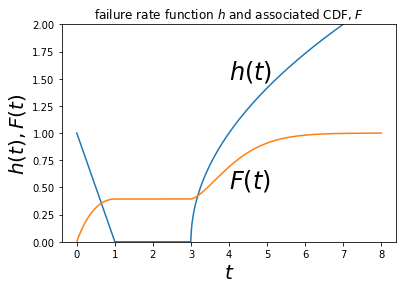

In [3]:
# Calculation of CDF from its failure rate function, using dF/dt=(1-F(t))h(t)
from scipy.integrate import odeint

def h(t):   # h is the failure rate function with a bathtub shape
    if t<1:
        return 1-t
    elif t<3:
        return 0.0
    else:
        return np.sqrt(t-3)
    

def Fdot(y,t):    
    return (1-y)*h(t)

t_max=8.0  #  Select so that F(t_max) is very close to one
time=np.linspace(0.0,t_max,1000)
Finit=0.0
F=odeint(Fdot,Finit,time)

plt.plot(time,list(map(h,time)))
plt.text(4,h(4)+0.5, r'$h(t)$',fontsize=24) #Plots labels in the graph
plt.text(4,0.5, r'$F(t)$',fontsize=24) 

plt.plot(time,F)
plt.title('failure rate function $h$ and associated CDF, $F$')
plt.axis(ymin=0,ymax=2.0)
plt.ylabel('$h(t), F(t)$',fontsize=20)
plt.xlabel('$t$',fontsize=20)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the information on failure rate functions and the example above, do the following:
<ol>
<li> Write code that, given the failure rate function of a random variable $T$, computes the mean lifetime, $E[T].$  Use this code to determine the mean lifetime for the example given above.  (Hint: An easy way to do this problem is to use the area rule for expectations. Since $T$ is nonnegative, the area rule for expectations gives $E[T]=\int_0^\infty(1-F(t)) dt.$
The integral $\int_0^\infty (1-F(t)) dt$ is approximately equal to
$\int_0^{t_{max}} (1-F(t)) dt,$  which, by the definition of Riemann integration, is approximately equal to
$h \sum_{i=1}^{1000} (1-F(h_i)) $ where $h=t_{max}/1000.$  Basically the code above returns the samples $F(h_i)$ so all you need to do is subtract these values from 1, sum them up and multiply by $h$.)
<li> What happens to $E[T]$ if the failure rate function is doubled for all time? Print out the new value of $E[T]$.
</ol>

In [6]:
# for part 1
from scipy.integrate import odeint

def h(t):   # h is the failure rate function with a bathtub shape
    if t<1:
        return 1-t
    elif t<3:
        return 0.0
    else:
        return np.sqrt(t-3)
    

def Fdot(y,t):    
    return (1-y)*h(t)

t_max=8.0  #  Select so that F(t_max) is very close to one
time=np.linspace(0.0,t_max,1000)
Finit=0.0
F=odeint(Fdot,Finit,time)

h = t_max/1000
t = 0
expect = 0
while (t < 1000):
    expect += 1 - F[t]
    t += 1
print ('the mean lifetime, E[T] is', expect*h)

the mean lifetime, E[T] is [2.65652422]


the mean lifetime, E[T] is [1.55044486]


Text(0.5,0,'$t$')

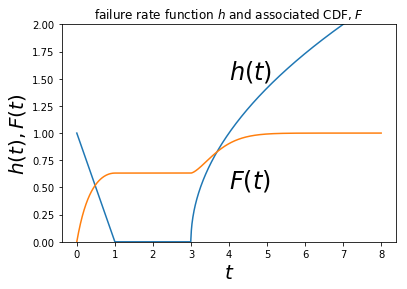

In [7]:
#for part 2
from scipy.integrate import odeint

def h(t):   # h is the failure rate function with a bathtub shape
    if t<1:
        return 1-t
    elif t<3:
        return 0.0
    else:
        return np.sqrt(t-3)
    

def Fdot(y,t):    
    return (1-y)*h(t)*2

t_max=8.0  #  Select so that F(t_max) is very close to one
time=np.linspace(0.0,t_max,1000)
Finit=0.0
F=odeint(Fdot,Finit,time)

h0 = t_max/1000
t = 0
expect = 0
while (t < 1000):
    expect += 1- F[t]
    t += 1
print ('the mean lifetime, E[T] is', expect*h0)

plt.plot(time,list(map(h,time)))
plt.text(4,h(4)+0.5, r'$h(t)$',fontsize=24) #Plots labels in the graph
plt.text(4,0.5, r'$F(t)$',fontsize=24) 

plt.plot(time,F)
plt.title('failure rate function $h$ and associated CDF, $F$')
plt.axis(ymin=0,ymax=2.0)
plt.ylabel('$h(t), F(t)$',fontsize=20)
plt.xlabel('$t$',fontsize=20)

__Answer:__ (Your answer here)
<li> for part 1 <li>
    the expectation is 2.65652422.<li>
<li> for part 2 <li>
    the value for E[T] decreases, the new E[T] is 1.55044486.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>** 

## Evolutionary games (replicator dynamics):

Consider a population of individuals, where each individual is of some type.  Suppose individuals have occasional pairwise encounters.  During an encounter the two individuals involved play a two player symmetric game in which the strategies are the types of the individuals.   As a result of the encounter, each of the two individuals produces a number of offspring of its same type, with the number being determined by a fitess table or, equivalently, a fitness matrix.   For example, consider a population of crickets such that each cricket is either small or large.   If two small crickets meet each other then they each spawn five more small crickets.  If a small cricket encounters a large cricket then the small cricket spawns one more small cricket and the large cricket spawns eight new large crickets.   If two large crickets meet then each of them spawns three new large crickets.  We can summarize these outcomes using the following table:
$$\begin{array}{c|cc}  & small & large  \\ \hline
    small & 5 & 1  \\
    large & 8 & 3
    \end{array}$$
or by a fitness matrix
$$F=\left( \begin{array}{cc}  5 & 1 \\ 8 & 3  \end{array}\right).$$ 
Associating 0 with "small" and 1 with "large,"  we see that if a type i individual encounters a type j individual, then the type i individual spawns F[i,j] new individuals of type i, and the type j individual spawns F[j,i] new individuals of type j. Below is a stochastic simulation for this game where we start with a population of four small crickets and four large crickets. It may be a useful exercise for you to think of how the values for $a$ and $b$ were created.


In [9]:
# Stochastic simulation of replicator dynamics for cricket game

F=np.array([[5,1],[8,3]])  # fitness matrix

n=np.array([1,100])  #[number of small crickets, number of large crickets], initialized
print ("                                   State      Fractions of each type")
print ("Initially                        ", n, "      ", n/1./np.sum(n))

T = 10000 #total number of encounters

for k in range(T):   # k tracks number of encounters
    a=n[0]*(n[0]-1.0)/((n[0]+n[1])*(n[0]+n[1]-1))  # probability both players are type 0
    b=2*n[0]*n[1]/((n[0]+n[1])*(n[0]+n[1]-1.0))  # probability one player of each type
    U=np.random.rand()
    if U<=a:
        n+=[2*F[0,0],0]
        print ("Round",k+1,"two small crickets meet ", n, n/1./np.sum(n))
    elif a<U<=a+b:
        n+=[F[0,1],F[1,0]]
        print ("Round",k+1,"a small meets a large   ", n, n/1./np.sum(n))
    else:
        n+=[0,2*F[1,1]]
        print ("Round",k+1,"two large crickets meet ", n, n/1./np.sum(n))


                                   State      Fractions of each type
Initially                         [  1 100]        [0.00990099 0.99009901]
Round 1 two large crickets meet  [  1 106] [0.00934579 0.99065421]
Round 2 two large crickets meet  [  1 112] [0.00884956 0.99115044]
Round 3 two large crickets meet  [  1 118] [0.00840336 0.99159664]
Round 4 two large crickets meet  [  1 124] [0.008 0.992]
Round 5 two large crickets meet  [  1 130] [0.00763359 0.99236641]
Round 6 two large crickets meet  [  1 136] [0.00729927 0.99270073]
Round 7 two large crickets meet  [  1 142] [0.00699301 0.99300699]
Round 8 two large crickets meet  [  1 148] [0.00671141 0.99328859]
Round 9 two large crickets meet  [  1 154] [0.00645161 0.99354839]
Round 10 two large crickets meet  [  1 160] [0.00621118 0.99378882]
Round 11 two large crickets meet  [  1 166] [0.00598802 0.99401198]
Round 12 two large crickets meet  [  1 172] [0.00578035 0.99421965]
Round 13 two large crickets meet  [  1 178] [0.00558659 0.9

Round 268 two large crickets meet  [   2 1710] [0.00116822 0.99883178]
Round 269 two large crickets meet  [   2 1716] [0.00116414 0.99883586]
Round 270 two large crickets meet  [   2 1722] [0.00116009 0.99883991]
Round 271 two large crickets meet  [   2 1728] [0.00115607 0.99884393]
Round 272 two large crickets meet  [   2 1734] [0.00115207 0.99884793]
Round 273 two large crickets meet  [   2 1740] [0.00114811 0.99885189]
Round 274 two large crickets meet  [   2 1746] [0.00114416 0.99885584]
Round 275 two large crickets meet  [   2 1752] [0.00114025 0.99885975]
Round 276 two large crickets meet  [   2 1758] [0.00113636 0.99886364]
Round 277 two large crickets meet  [   2 1764] [0.0011325 0.9988675]
Round 278 two large crickets meet  [   2 1770] [0.00112867 0.99887133]
Round 279 two large crickets meet  [   2 1776] [0.00112486 0.99887514]
Round 280 two large crickets meet  [   2 1782] [0.00112108 0.99887892]
Round 281 two large crickets meet  [   2 1788] [0.00111732 0.99888268]
Round 28

Round 447 two large crickets meet  [   5 2790] [0.00178891 0.99821109]
Round 448 two large crickets meet  [   5 2796] [0.00178508 0.99821492]
Round 449 two large crickets meet  [   5 2802] [0.00178126 0.99821874]
Round 450 two large crickets meet  [   5 2808] [0.00177746 0.99822254]
Round 451 two large crickets meet  [   5 2814] [0.00177368 0.99822632]
Round 452 two large crickets meet  [   5 2820] [0.00176991 0.99823009]
Round 453 two large crickets meet  [   5 2826] [0.00176616 0.99823384]
Round 454 two large crickets meet  [   5 2832] [0.00176243 0.99823757]
Round 455 two large crickets meet  [   5 2838] [0.00175871 0.99824129]
Round 456 two large crickets meet  [   5 2844] [0.001755 0.998245]
Round 457 two large crickets meet  [   5 2850] [0.00175131 0.99824869]
Round 458 two large crickets meet  [   5 2856] [0.00174764 0.99825236]
Round 459 two large crickets meet  [   5 2862] [0.00174398 0.99825602]
Round 460 two large crickets meet  [   5 2868] [0.00174034 0.99825966]
Round 461 

Round 657 two large crickets meet  [   5 4050] [0.00123305 0.99876695]
Round 658 two large crickets meet  [   5 4056] [0.00123122 0.99876878]
Round 659 two large crickets meet  [   5 4062] [0.00122941 0.99877059]
Round 660 two large crickets meet  [   5 4068] [0.0012276 0.9987724]
Round 661 two large crickets meet  [   5 4074] [0.00122579 0.99877421]
Round 662 two large crickets meet  [   5 4080] [0.00122399 0.99877601]
Round 663 two large crickets meet  [   5 4086] [0.0012222 0.9987778]
Round 664 two large crickets meet  [   5 4092] [0.00122041 0.99877959]
Round 665 two large crickets meet  [   5 4098] [0.00121862 0.99878138]
Round 666 two large crickets meet  [   5 4104] [0.00121684 0.99878316]
Round 667 two large crickets meet  [   5 4110] [0.00121507 0.99878493]
Round 668 two large crickets meet  [   5 4116] [0.0012133 0.9987867]
Round 669 two large crickets meet  [   5 4122] [0.00121153 0.99878847]
Round 670 two large crickets meet  [   5 4128] [0.00120977 0.99879023]
Round 671 tw

Round 851 two large crickets meet  [   6 5216] [0.00114899 0.99885101]
Round 852 two large crickets meet  [   6 5222] [0.00114767 0.99885233]
Round 853 two large crickets meet  [   6 5228] [0.00114635 0.99885365]
Round 854 two large crickets meet  [   6 5234] [0.00114504 0.99885496]
Round 855 two large crickets meet  [   6 5240] [0.00114373 0.99885627]
Round 856 two large crickets meet  [   6 5246] [0.00114242 0.99885758]
Round 857 two large crickets meet  [   6 5252] [0.00114112 0.99885888]
Round 858 two large crickets meet  [   6 5258] [0.00113982 0.99886018]
Round 859 two large crickets meet  [   6 5264] [0.00113852 0.99886148]
Round 860 two large crickets meet  [   6 5270] [0.00113723 0.99886277]
Round 861 two large crickets meet  [   6 5276] [0.00113593 0.99886407]
Round 862 two large crickets meet  [   6 5282] [0.00113464 0.99886536]
Round 863 two large crickets meet  [   6 5288] [0.00113336 0.99886664]
Round 864 two large crickets meet  [   6 5294] [0.00113208 0.99886792]
Round 

Round 972 two large crickets meet  [   6 5942] [0.00100874 0.99899126]
Round 973 two large crickets meet  [   6 5948] [0.00100773 0.99899227]
Round 974 two large crickets meet  [   6 5954] [0.00100671 0.99899329]
Round 975 two large crickets meet  [   6 5960] [0.0010057 0.9989943]
Round 976 two large crickets meet  [   6 5966] [0.00100469 0.99899531]
Round 977 two large crickets meet  [   6 5972] [0.00100368 0.99899632]
Round 978 two large crickets meet  [   6 5978] [0.00100267 0.99899733]
Round 979 two large crickets meet  [   6 5984] [0.00100167 0.99899833]
Round 980 two large crickets meet  [   6 5990] [0.00100067 0.99899933]
Round 981 two large crickets meet  [   6 5996] [0.00099967 0.99900033]
Round 982 two large crickets meet  [   6 6002] [9.98668442e-04 9.99001332e-01]
Round 983 two large crickets meet  [   6 6008] [9.97672098e-04 9.99002328e-01]
Round 984 two large crickets meet  [   6 6014] [9.96677741e-04 9.99003322e-01]
Round 985 two large crickets meet  [   6 6020] [9.95685

Round 1172 two large crickets meet  [   6 7142] [8.39395635e-04 9.99160604e-01]
Round 1173 two large crickets meet  [   6 7148] [8.38691641e-04 9.99161308e-01]
Round 1174 two large crickets meet  [   6 7154] [8.37988827e-04 9.99162011e-01]
Round 1175 two large crickets meet  [   6 7160] [8.37287190e-04 9.99162713e-01]
Round 1176 two large crickets meet  [   6 7166] [8.36586726e-04 9.99163413e-01]
Round 1177 two large crickets meet  [   6 7172] [8.35887434e-04 9.99164113e-01]
Round 1178 two large crickets meet  [   6 7178] [8.35189310e-04 9.99164811e-01]
Round 1179 two large crickets meet  [   6 7184] [8.34492350e-04 9.99165508e-01]
Round 1180 two large crickets meet  [   6 7190] [8.33796554e-04 9.99166203e-01]
Round 1181 two large crickets meet  [   6 7196] [8.33101916e-04 9.99166898e-01]
Round 1182 two large crickets meet  [   6 7202] [8.32408435e-04 9.99167592e-01]
Round 1183 two large crickets meet  [   6 7208] [8.31716108e-04 9.99168284e-01]
Round 1184 two large crickets meet  [   

Round 1372 two large crickets meet  [   6 8342] [7.18735026e-04 9.99281265e-01]
Round 1373 two large crickets meet  [   6 8348] [7.18218817e-04 9.99281781e-01]
Round 1374 two large crickets meet  [   6 8354] [7.17703349e-04 9.99282297e-01]
Round 1375 two large crickets meet  [   6 8360] [7.17188621e-04 9.99282811e-01]
Round 1376 two large crickets meet  [   6 8366] [7.16674630e-04 9.99283325e-01]
Round 1377 two large crickets meet  [   6 8372] [7.16161375e-04 9.99283839e-01]
Round 1378 two large crickets meet  [   6 8378] [7.15648855e-04 9.99284351e-01]
Round 1379 two large crickets meet  [   6 8384] [7.15137068e-04 9.99284863e-01]
Round 1380 two large crickets meet  [   6 8390] [7.14626012e-04 9.99285374e-01]
Round 1381 two large crickets meet  [   6 8396] [7.14115687e-04 9.99285884e-01]
Round 1382 two large crickets meet  [   6 8402] [7.13606089e-04 9.99286394e-01]
Round 1383 two large crickets meet  [   6 8408] [7.13097219e-04 9.99286903e-01]
Round 1384 two large crickets meet  [   

Round 1597 two large crickets meet  [   6 9692] [6.18684265e-04 9.99381316e-01]
Round 1598 two large crickets meet  [   6 9698] [6.18301731e-04 9.99381698e-01]
Round 1599 two large crickets meet  [   6 9704] [6.1791967e-04 9.9938208e-01]
Round 1600 two large crickets meet  [   6 9710] [6.17538082e-04 9.99382462e-01]
Round 1601 two large crickets meet  [   6 9716] [6.17156964e-04 9.99382843e-01]
Round 1602 two large crickets meet  [   6 9722] [6.16776316e-04 9.99383224e-01]
Round 1603 two large crickets meet  [   6 9728] [6.16396137e-04 9.99383604e-01]
Round 1604 two large crickets meet  [   6 9734] [6.16016427e-04 9.99383984e-01]
Round 1605 two large crickets meet  [   6 9740] [6.15637184e-04 9.99384363e-01]
Round 1606 two large crickets meet  [   6 9746] [6.15258409e-04 9.99384742e-01]
Round 1607 two large crickets meet  [   6 9752] [6.14880098e-04 9.99385120e-01]
Round 1608 two large crickets meet  [   6 9758] [6.14502253e-04 9.99385498e-01]
Round 1609 two large crickets meet  [   6 

Round 1862 two large crickets meet  [    6 11282] [5.31537916e-04 9.99468462e-01]
Round 1863 two large crickets meet  [    6 11288] [5.31255534e-04 9.99468744e-01]
Round 1864 two large crickets meet  [    6 11294] [5.30973451e-04 9.99469027e-01]
Round 1865 two large crickets meet  [    6 11300] [5.30691668e-04 9.99469308e-01]
Round 1866 two large crickets meet  [    6 11306] [5.30410184e-04 9.99469590e-01]
Round 1867 two large crickets meet  [    6 11312] [5.30128998e-04 9.99469871e-01]
Round 1868 two large crickets meet  [    6 11318] [5.29848110e-04 9.99470152e-01]
Round 1869 two large crickets meet  [    6 11324] [5.29567520e-04 9.99470432e-01]
Round 1870 two large crickets meet  [    6 11330] [5.29287227e-04 9.99470713e-01]
Round 1871 two large crickets meet  [    6 11336] [5.29007230e-04 9.99470993e-01]
Round 1872 two large crickets meet  [    6 11342] [5.28727529e-04 9.99471272e-01]
Round 1873 two large crickets meet  [    6 11348] [5.28448124e-04 9.99471552e-01]
Round 1874 two l

Round 2072 two large crickets meet  [    6 12542] [4.78163851e-04 9.99521836e-01]
Round 2073 two large crickets meet  [    6 12548] [4.77935319e-04 9.99522065e-01]
Round 2074 two large crickets meet  [    6 12554] [4.77707006e-04 9.99522293e-01]
Round 2075 two large crickets meet  [    6 12560] [4.77478911e-04 9.99522521e-01]
Round 2076 two large crickets meet  [    6 12566] [4.77251034e-04 9.99522749e-01]
Round 2077 two large crickets meet  [    6 12572] [4.77023374e-04 9.99522977e-01]
Round 2078 two large crickets meet  [    6 12578] [4.76795931e-04 9.99523204e-01]
Round 2079 two large crickets meet  [    6 12584] [4.76568705e-04 9.99523431e-01]
Round 2080 two large crickets meet  [    6 12590] [4.76341696e-04 9.99523658e-01]
Round 2081 two large crickets meet  [    6 12596] [4.76114902e-04 9.99523885e-01]
Round 2082 two large crickets meet  [    6 12602] [4.75888325e-04 9.99524112e-01]
Round 2083 two large crickets meet  [    6 12608] [4.75661963e-04 9.99524338e-01]
Round 2084 two l

Round 2272 two large crickets meet  [    6 13742] [4.36427117e-04 9.99563573e-01]
Round 2273 two large crickets meet  [    6 13748] [4.36236731e-04 9.99563763e-01]
Round 2274 two large crickets meet  [    6 13754] [4.36046512e-04 9.99563953e-01]
Round 2275 two large crickets meet  [    6 13760] [4.35856458e-04 9.99564144e-01]
Round 2276 two large crickets meet  [    6 13766] [4.35666570e-04 9.99564333e-01]
Round 2277 two large crickets meet  [    6 13772] [4.35476847e-04 9.99564523e-01]
Round 2278 two large crickets meet  [    6 13778] [4.35287290e-04 9.99564713e-01]
Round 2279 two large crickets meet  [    6 13784] [4.35097897e-04 9.99564902e-01]
Round 2280 two large crickets meet  [    6 13790] [4.34908669e-04 9.99565091e-01]
Round 2281 two large crickets meet  [    6 13796] [4.34719606e-04 9.99565280e-01]
Round 2282 two large crickets meet  [    6 13802] [4.34530707e-04 9.99565469e-01]
Round 2283 two large crickets meet  [    6 13808] [4.34341972e-04 9.99565658e-01]
Round 2284 two l

Round 2472 two large crickets meet  [    6 14942] [4.01391491e-04 9.99598609e-01]
Round 2473 two large crickets meet  [    6 14948] [4.0123044e-04 9.9959877e-01]
Round 2474 two large crickets meet  [    6 14954] [4.01069519e-04 9.99598930e-01]
Round 2475 two large crickets meet  [    6 14960] [4.00908726e-04 9.99599091e-01]
Round 2476 two large crickets meet  [    6 14966] [4.00748063e-04 9.99599252e-01]
Round 2477 two large crickets meet  [    6 14972] [4.00587528e-04 9.99599412e-01]
Round 2478 two large crickets meet  [    6 14978] [4.00427122e-04 9.99599573e-01]
Round 2479 two large crickets meet  [    6 14984] [4.00266845e-04 9.99599733e-01]
Round 2480 two large crickets meet  [    6 14990] [4.00106695e-04 9.99599893e-01]
Round 2481 two large crickets meet  [    6 14996] [3.99946674e-04 9.99600053e-01]
Round 2482 two large crickets meet  [    6 15002] [3.99786780e-04 9.99600213e-01]
Round 2483 two large crickets meet  [    6 15008] [3.99627015e-04 9.99600373e-01]
Round 2484 two lar

Round 2672 two large crickets meet  [    6 16142] [3.71563042e-04 9.99628437e-01]
Round 2673 two large crickets meet  [    6 16148] [3.71425034e-04 9.99628575e-01]
Round 2674 two large crickets meet  [    6 16154] [3.71287129e-04 9.99628713e-01]
Round 2675 two large crickets meet  [    6 16160] [3.71149326e-04 9.99628851e-01]
Round 2676 two large crickets meet  [    6 16166] [3.71011625e-04 9.99628988e-01]
Round 2677 two large crickets meet  [    6 16172] [3.70874026e-04 9.99629126e-01]
Round 2678 two large crickets meet  [    6 16178] [3.70736530e-04 9.99629263e-01]
Round 2679 two large crickets meet  [    6 16184] [3.70599135e-04 9.99629401e-01]
Round 2680 two large crickets meet  [    6 16190] [3.70461842e-04 9.99629538e-01]
Round 2681 two large crickets meet  [    6 16196] [3.70324651e-04 9.99629675e-01]
Round 2682 two large crickets meet  [    6 16202] [3.70187562e-04 9.99629812e-01]
Round 2683 two large crickets meet  [    6 16208] [3.70050574e-04 9.99629949e-01]
Round 2684 two l

Round 2892 two large crickets meet  [    6 17462] [3.43485230e-04 9.99656515e-01]
Round 2893 two large crickets meet  [    6 17468] [3.43367289e-04 9.99656633e-01]
Round 2894 two large crickets meet  [    6 17474] [3.43249428e-04 9.99656751e-01]
Round 2895 two large crickets meet  [    6 17480] [3.43131648e-04 9.99656868e-01]
Round 2896 two large crickets meet  [    6 17486] [3.43013949e-04 9.99656986e-01]
Round 2897 two large crickets meet  [    6 17492] [3.42896331e-04 9.99657104e-01]
Round 2898 two large crickets meet  [    6 17498] [3.42778793e-04 9.99657221e-01]
Round 2899 two large crickets meet  [    6 17504] [3.42661336e-04 9.99657339e-01]
Round 2900 two large crickets meet  [    6 17510] [3.42543960e-04 9.99657456e-01]
Round 2901 two large crickets meet  [    6 17516] [3.42426664e-04 9.99657573e-01]
Round 2902 two large crickets meet  [    6 17522] [3.42309448e-04 9.99657691e-01]
Round 2903 two large crickets meet  [    6 17528] [3.42192312e-04 9.99657808e-01]
Round 2904 two l

Round 3071 two large crickets meet  [    7 18538] [3.77460232e-04 9.99622540e-01]
Round 3072 two large crickets meet  [    7 18544] [3.77338149e-04 9.99622662e-01]
Round 3073 two large crickets meet  [    7 18550] [3.77216145e-04 9.99622784e-01]
Round 3074 two large crickets meet  [    7 18556] [3.77094220e-04 9.99622906e-01]
Round 3075 two large crickets meet  [    7 18562] [3.76972373e-04 9.99623028e-01]
Round 3076 two large crickets meet  [    7 18568] [3.76850606e-04 9.99623149e-01]
Round 3077 two large crickets meet  [    7 18574] [3.76728917e-04 9.99623271e-01]
Round 3078 two large crickets meet  [    7 18580] [3.76607306e-04 9.99623393e-01]
Round 3079 two large crickets meet  [    7 18586] [3.76485774e-04 9.99623514e-01]
Round 3080 two large crickets meet  [    7 18592] [3.76364321e-04 9.99623636e-01]
Round 3081 two large crickets meet  [    7 18598] [3.76242945e-04 9.99623757e-01]
Round 3082 two large crickets meet  [    7 18604] [3.76121648e-04 9.99623878e-01]
Round 3083 two l

Round 3347 two large crickets meet  [    7 20194] [3.46517499e-04 9.99653483e-01]
Round 3348 two large crickets meet  [    7 20200] [3.46414609e-04 9.99653585e-01]
Round 3349 two large crickets meet  [    7 20206] [3.46311780e-04 9.99653688e-01]
Round 3350 two large crickets meet  [    7 20212] [3.46209011e-04 9.99653791e-01]
Round 3351 two large crickets meet  [    7 20218] [3.46106304e-04 9.99653894e-01]
Round 3352 two large crickets meet  [    7 20224] [3.46003658e-04 9.99653996e-01]
Round 3353 two large crickets meet  [    7 20230] [3.45901072e-04 9.99654099e-01]
Round 3354 two large crickets meet  [    7 20236] [3.45798548e-04 9.99654201e-01]
Round 3355 two large crickets meet  [    7 20242] [3.45696084e-04 9.99654304e-01]
Round 3356 two large crickets meet  [    7 20248] [3.45593681e-04 9.99654406e-01]
Round 3357 two large crickets meet  [    7 20254] [3.45491338e-04 9.99654509e-01]
Round 3358 two large crickets meet  [    7 20260] [3.45389056e-04 9.99654611e-01]
Round 3359 two l

Round 3571 two large crickets meet  [    8 21540] [3.71264154e-04 9.99628736e-01]
Round 3572 two large crickets meet  [    8 21546] [3.71160805e-04 9.99628839e-01]
Round 3573 two large crickets meet  [    8 21552] [3.71057514e-04 9.99628942e-01]
Round 3574 two large crickets meet  [    8 21558] [3.70954280e-04 9.99629046e-01]
Round 3575 two large crickets meet  [    8 21564] [3.70851103e-04 9.99629149e-01]
Round 3576 two large crickets meet  [    8 21570] [3.70747984e-04 9.99629252e-01]
Round 3577 two large crickets meet  [    8 21576] [3.70644922e-04 9.99629355e-01]
Round 3578 two large crickets meet  [    8 21582] [3.70541918e-04 9.99629458e-01]
Round 3579 two large crickets meet  [    8 21588] [3.70438970e-04 9.99629561e-01]
Round 3580 two large crickets meet  [    8 21594] [3.70336080e-04 9.99629664e-01]
Round 3581 two large crickets meet  [    8 21600] [3.70233247e-04 9.99629767e-01]
Round 3582 two large crickets meet  [    8 21606] [3.70130471e-04 9.99629870e-01]
Round 3583 two l

Round 3871 two large crickets meet  [    8 23340] [3.42641768e-04 9.99657358e-01]
Round 3872 two large crickets meet  [    8 23346] [3.42553738e-04 9.99657446e-01]
Round 3873 two large crickets meet  [    8 23352] [3.42465753e-04 9.99657534e-01]
Round 3874 two large crickets meet  [    8 23358] [3.42377814e-04 9.99657622e-01]
Round 3875 two large crickets meet  [    8 23364] [3.4228992e-04 9.9965771e-01]
Round 3876 two large crickets meet  [    8 23370] [3.42202070e-04 9.99657798e-01]
Round 3877 two large crickets meet  [    8 23376] [3.42114266e-04 9.99657886e-01]
Round 3878 two large crickets meet  [    8 23382] [3.42026507e-04 9.99657973e-01]
Round 3879 two large crickets meet  [    8 23388] [3.41938793e-04 9.99658061e-01]
Round 3880 two large crickets meet  [    8 23394] [3.41851124e-04 9.99658149e-01]
Round 3881 two large crickets meet  [    8 23400] [3.41763500e-04 9.99658237e-01]
Round 3882 two large crickets meet  [    8 23406] [3.41675920e-04 9.99658324e-01]
Round 3883 two lar

Round 4171 two large crickets meet  [    8 25140] [3.18116749e-04 9.99681883e-01]
Round 4172 two large crickets meet  [    8 25146] [3.18040868e-04 9.99681959e-01]
Round 4173 two large crickets meet  [    8 25152] [3.17965024e-04 9.99682035e-01]
Round 4174 two large crickets meet  [    8 25158] [3.17889216e-04 9.99682111e-01]
Round 4175 two large crickets meet  [    8 25164] [3.17813444e-04 9.99682187e-01]
Round 4176 two large crickets meet  [    8 25170] [3.17737708e-04 9.99682262e-01]
Round 4177 two large crickets meet  [    8 25176] [3.17662008e-04 9.99682338e-01]
Round 4178 two large crickets meet  [    8 25182] [3.17586344e-04 9.99682414e-01]
Round 4179 two large crickets meet  [    8 25188] [3.17510716e-04 9.99682489e-01]
Round 4180 two large crickets meet  [    8 25194] [3.17435124e-04 9.99682565e-01]
Round 4181 two large crickets meet  [    8 25200] [3.17359568e-04 9.99682640e-01]
Round 4182 two large crickets meet  [    8 25206] [3.17284049e-04 9.99682716e-01]
Round 4183 two l

Round 4371 two large crickets meet  [    8 26340] [3.03628359e-04 9.99696372e-01]
Round 4372 two large crickets meet  [    8 26346] [3.03559232e-04 9.99696441e-01]
Round 4373 two large crickets meet  [    8 26352] [3.03490137e-04 9.99696510e-01]
Round 4374 two large crickets meet  [    8 26358] [3.03421073e-04 9.99696579e-01]
Round 4375 two large crickets meet  [    8 26364] [3.03352040e-04 9.99696648e-01]
Round 4376 two large crickets meet  [    8 26370] [3.03283039e-04 9.99696717e-01]
Round 4377 two large crickets meet  [    8 26376] [3.03214069e-04 9.99696786e-01]
Round 4378 two large crickets meet  [    8 26382] [3.03145131e-04 9.99696855e-01]
Round 4379 two large crickets meet  [    8 26388] [3.03076224e-04 9.99696924e-01]
Round 4380 two large crickets meet  [    8 26394] [3.03007348e-04 9.99696993e-01]
Round 4381 two large crickets meet  [    8 26400] [3.02938503e-04 9.99697061e-01]
Round 4382 two large crickets meet  [    8 26406] [3.0286969e-04 9.9969713e-01]
Round 4383 two lar

Round 4571 two large crickets meet  [    8 27540] [2.90402207e-04 9.99709598e-01]
Round 4572 two large crickets meet  [    8 27546] [2.90338971e-04 9.99709661e-01]
Round 4573 two large crickets meet  [    8 27552] [2.90275762e-04 9.99709724e-01]
Round 4574 two large crickets meet  [    8 27558] [2.90212581e-04 9.99709787e-01]
Round 4575 two large crickets meet  [    8 27564] [2.90149427e-04 9.99709851e-01]
Round 4576 two large crickets meet  [    8 27570] [2.90086301e-04 9.99709914e-01]
Round 4577 two large crickets meet  [    8 27576] [2.90023202e-04 9.99709977e-01]
Round 4578 two large crickets meet  [    8 27582] [2.8996013e-04 9.9971004e-01]
Round 4579 two large crickets meet  [    8 27588] [2.89897087e-04 9.99710103e-01]
Round 4580 two large crickets meet  [    8 27594] [2.89834070e-04 9.99710166e-01]
Round 4581 two large crickets meet  [    8 27600] [2.89771081e-04 9.99710229e-01]
Round 4582 two large crickets meet  [    8 27606] [2.89708119e-04 9.99710292e-01]
Round 4583 two lar

Round 4813 two large crickets meet  [    8 28992] [2.75862069e-04 9.99724138e-01]
Round 4814 two large crickets meet  [    8 28998] [2.75805006e-04 9.99724195e-01]
Round 4815 two large crickets meet  [    8 29004] [2.75747966e-04 9.99724252e-01]
Round 4816 two large crickets meet  [    8 29010] [2.75690950e-04 9.99724309e-01]
Round 4817 two large crickets meet  [    8 29016] [2.75633958e-04 9.99724366e-01]
Round 4818 two large crickets meet  [    8 29022] [2.75576989e-04 9.99724423e-01]
Round 4819 two large crickets meet  [    8 29028] [2.75520044e-04 9.99724480e-01]
Round 4820 two large crickets meet  [    8 29034] [2.75463122e-04 9.99724537e-01]
Round 4821 two large crickets meet  [    8 29040] [2.75406224e-04 9.99724594e-01]
Round 4822 two large crickets meet  [    8 29046] [2.75349349e-04 9.99724651e-01]
Round 4823 two large crickets meet  [    8 29052] [2.75292498e-04 9.99724708e-01]
Round 4824 two large crickets meet  [    8 29058] [2.75235671e-04 9.99724764e-01]
Round 4825 two l

Round 5071 two large crickets meet  [    8 30540] [2.61882938e-04 9.99738117e-01]
Round 5072 two large crickets meet  [    8 30546] [2.61831511e-04 9.99738168e-01]
Round 5073 two large crickets meet  [    8 30552] [2.61780105e-04 9.99738220e-01]
Round 5074 two large crickets meet  [    8 30558] [2.61728718e-04 9.99738271e-01]
Round 5075 two large crickets meet  [    8 30564] [2.61677352e-04 9.99738323e-01]
Round 5076 two large crickets meet  [    8 30570] [2.61626006e-04 9.99738374e-01]
Round 5077 two large crickets meet  [    8 30576] [2.61574680e-04 9.99738425e-01]
Round 5078 two large crickets meet  [    8 30582] [2.61523374e-04 9.99738477e-01]
Round 5079 two large crickets meet  [    8 30588] [2.61472088e-04 9.99738528e-01]
Round 5080 two large crickets meet  [    8 30594] [2.61420822e-04 9.99738579e-01]
Round 5081 two large crickets meet  [    8 30600] [2.61369577e-04 9.99738630e-01]
Round 5082 two large crickets meet  [    8 30606] [2.61318351e-04 9.99738682e-01]
Round 5083 two l

Round 5346 two large crickets meet  [    9 32192] [2.79494426e-04 9.99720506e-01]
Round 5347 two large crickets meet  [    9 32198] [2.79442357e-04 9.99720558e-01]
Round 5348 two large crickets meet  [    9 32204] [2.79390308e-04 9.99720610e-01]
Round 5349 two large crickets meet  [    9 32210] [2.79338279e-04 9.99720662e-01]
Round 5350 two large crickets meet  [    9 32216] [2.79286268e-04 9.99720714e-01]
Round 5351 two large crickets meet  [    9 32222] [2.79234278e-04 9.99720766e-01]
Round 5352 two large crickets meet  [    9 32228] [2.79182306e-04 9.99720818e-01]
Round 5353 two large crickets meet  [    9 32234] [2.79130354e-04 9.99720870e-01]
Round 5354 two large crickets meet  [    9 32240] [2.79078421e-04 9.99720922e-01]
Round 5355 two large crickets meet  [    9 32246] [2.79026508e-04 9.99720973e-01]
Round 5356 two large crickets meet  [    9 32252] [2.78974613e-04 9.99721025e-01]
Round 5357 two large crickets meet  [    9 32258] [2.78922738e-04 9.99721077e-01]
Round 5358 two l

Round 5570 two large crickets meet  [    9 33536] [2.68296318e-04 9.99731704e-01]
Round 5571 two large crickets meet  [    9 33542] [2.68248338e-04 9.99731752e-01]
Round 5572 two large crickets meet  [    9 33548] [2.68200375e-04 9.99731800e-01]
Round 5573 two large crickets meet  [    9 33554] [2.68152430e-04 9.99731848e-01]
Round 5574 two large crickets meet  [    9 33560] [2.68104501e-04 9.99731895e-01]
Round 5575 two large crickets meet  [    9 33566] [2.68056590e-04 9.99731943e-01]
Round 5576 two large crickets meet  [    9 33572] [2.68008695e-04 9.99731991e-01]
Round 5577 two large crickets meet  [    9 33578] [2.67960818e-04 9.99732039e-01]
Round 5578 two large crickets meet  [    9 33584] [2.67912958e-04 9.99732087e-01]
Round 5579 two large crickets meet  [    9 33590] [2.67865115e-04 9.99732135e-01]
Round 5580 two large crickets meet  [    9 33596] [2.67817289e-04 9.99732183e-01]
Round 5581 two large crickets meet  [    9 33602] [2.67769480e-04 9.99732231e-01]
Round 5582 two l

Round 5861 two large crickets meet  [    9 35282] [2.55022527e-04 9.99744977e-01]
Round 5862 two large crickets meet  [    9 35288] [2.54979177e-04 9.99745021e-01]
Round 5863 two large crickets meet  [    9 35294] [2.54935841e-04 9.99745064e-01]
Round 5864 two large crickets meet  [    9 35300] [2.54892520e-04 9.99745107e-01]
Round 5865 two large crickets meet  [    9 35306] [2.54849214e-04 9.99745151e-01]
Round 5866 two large crickets meet  [    9 35312] [2.54805923e-04 9.99745194e-01]
Round 5867 two large crickets meet  [    9 35318] [2.54762646e-04 9.99745237e-01]
Round 5868 two large crickets meet  [    9 35324] [2.54719384e-04 9.99745281e-01]
Round 5869 two large crickets meet  [    9 35330] [2.54676137e-04 9.99745324e-01]
Round 5870 two large crickets meet  [    9 35336] [2.54632904e-04 9.99745367e-01]
Round 5871 two large crickets meet  [    9 35342] [2.54589686e-04 9.99745410e-01]
Round 5872 two large crickets meet  [    9 35348] [2.54546483e-04 9.99745454e-01]
Round 5873 two l

Round 6070 two large crickets meet  [    9 36536] [2.46271720e-04 9.99753728e-01]
Round 6071 two large crickets meet  [    9 36542] [2.46231293e-04 9.99753769e-01]
Round 6072 two large crickets meet  [    9 36548] [2.46190880e-04 9.99753809e-01]
Round 6073 two large crickets meet  [    9 36554] [2.4615048e-04 9.9975385e-01]
Round 6074 two large crickets meet  [    9 36560] [2.46110093e-04 9.99753890e-01]
Round 6075 two large crickets meet  [    9 36566] [2.4606972e-04 9.9975393e-01]
Round 6076 two large crickets meet  [    9 36572] [2.46029360e-04 9.99753971e-01]
Round 6077 two large crickets meet  [    9 36578] [2.45989012e-04 9.99754011e-01]
Round 6078 two large crickets meet  [    9 36584] [2.45948679e-04 9.99754051e-01]
Round 6079 two large crickets meet  [    9 36590] [2.45908358e-04 9.99754092e-01]
Round 6080 two large crickets meet  [    9 36596] [2.45868051e-04 9.99754132e-01]
Round 6081 two large crickets meet  [    9 36602] [2.45827757e-04 9.99754172e-01]
Round 6082 two large

Round 6349 two large crickets meet  [    9 38210] [2.35484968e-04 9.99764515e-01]
Round 6350 two large crickets meet  [    9 38216] [2.35448005e-04 9.99764552e-01]
Round 6351 two large crickets meet  [    9 38222] [2.35411054e-04 9.99764589e-01]
Round 6352 two large crickets meet  [    9 38228] [2.35374114e-04 9.99764626e-01]
Round 6353 two large crickets meet  [    9 38234] [2.35337186e-04 9.99764663e-01]
Round 6354 two large crickets meet  [    9 38240] [2.35300269e-04 9.99764700e-01]
Round 6355 two large crickets meet  [    9 38246] [2.35263364e-04 9.99764737e-01]
Round 6356 two large crickets meet  [    9 38252] [2.35226471e-04 9.99764774e-01]
Round 6357 two large crickets meet  [    9 38258] [2.35189589e-04 9.99764810e-01]
Round 6358 two large crickets meet  [    9 38264] [2.35152719e-04 9.99764847e-01]
Round 6359 two large crickets meet  [    9 38270] [2.35115860e-04 9.99764884e-01]
Round 6360 two large crickets meet  [    9 38276] [2.35079013e-04 9.99764921e-01]
Round 6361 two l

Round 6570 two large crickets meet  [   10 39538] [2.52857287e-04 9.99747143e-01]
Round 6571 two large crickets meet  [   10 39544] [2.52818931e-04 9.99747181e-01]
Round 6572 two large crickets meet  [   10 39550] [2.52780586e-04 9.99747219e-01]
Round 6573 two large crickets meet  [   10 39556] [2.52742253e-04 9.99747258e-01]
Round 6574 two large crickets meet  [   10 39562] [2.52703932e-04 9.99747296e-01]
Round 6575 two large crickets meet  [   10 39568] [2.52665622e-04 9.99747334e-01]
Round 6576 two large crickets meet  [   10 39574] [2.52627324e-04 9.99747373e-01]
Round 6577 two large crickets meet  [   10 39580] [2.52589038e-04 9.99747411e-01]
Round 6578 two large crickets meet  [   10 39586] [2.52550763e-04 9.99747449e-01]
Round 6579 two large crickets meet  [   10 39592] [2.52512499e-04 9.99747488e-01]
Round 6580 two large crickets meet  [   10 39598] [2.52474248e-04 9.99747526e-01]
Round 6581 two large crickets meet  [   10 39604] [2.52436007e-04 9.99747564e-01]
Round 6582 two l

Round 6870 two large crickets meet  [   12 41342] [2.90177492e-04 9.99709823e-01]
Round 6871 two large crickets meet  [   12 41348] [2.90135397e-04 9.99709865e-01]
Round 6872 two large crickets meet  [   12 41354] [2.90093313e-04 9.99709907e-01]
Round 6873 two large crickets meet  [   12 41360] [2.90051242e-04 9.99709949e-01]
Round 6874 two large crickets meet  [   12 41366] [2.90009184e-04 9.99709991e-01]
Round 6875 two large crickets meet  [   12 41372] [2.89967137e-04 9.99710033e-01]
Round 6876 two large crickets meet  [   12 41378] [2.89925103e-04 9.99710075e-01]
Round 6877 two large crickets meet  [   12 41384] [2.89883080e-04 9.99710117e-01]
Round 6878 two large crickets meet  [   12 41390] [2.89841070e-04 9.99710159e-01]
Round 6879 two large crickets meet  [   12 41396] [2.89799073e-04 9.99710201e-01]
Round 6880 two large crickets meet  [   12 41402] [2.89757087e-04 9.99710243e-01]
Round 6881 two large crickets meet  [   12 41408] [2.89715113e-04 9.99710285e-01]
Round 6882 two l

Round 7161 two large crickets meet  [   12 43088] [2.78422274e-04 9.99721578e-01]
Round 7162 two large crickets meet  [   12 43094] [2.78383520e-04 9.99721616e-01]
Round 7163 two large crickets meet  [   12 43100] [2.78344776e-04 9.99721655e-01]
Round 7164 two large crickets meet  [   12 43106] [2.78306044e-04 9.99721694e-01]
Round 7165 two large crickets meet  [   12 43112] [2.78267322e-04 9.99721733e-01]
Round 7166 two large crickets meet  [   12 43118] [2.78228611e-04 9.99721771e-01]
Round 7167 two large crickets meet  [   12 43124] [2.78189911e-04 9.99721810e-01]
Round 7168 two large crickets meet  [   12 43130] [2.78151222e-04 9.99721849e-01]
Round 7169 two large crickets meet  [   12 43136] [2.78112543e-04 9.99721887e-01]
Round 7170 two large crickets meet  [   12 43142] [2.78073875e-04 9.99721926e-01]
Round 7171 two large crickets meet  [   12 43148] [2.78035218e-04 9.99721965e-01]
Round 7172 two large crickets meet  [   12 43154] [2.77996571e-04 9.99722003e-01]
Round 7173 two l

Round 7270 two large crickets meet  [   12 43742] [2.74260639e-04 9.99725739e-01]
Round 7271 two large crickets meet  [   12 43748] [2.74223035e-04 9.99725777e-01]
Round 7272 two large crickets meet  [   12 43754] [2.74185441e-04 9.99725815e-01]
Round 7273 two large crickets meet  [   12 43760] [2.74147857e-04 9.99725852e-01]
Round 7274 two large crickets meet  [   12 43766] [2.74110284e-04 9.99725890e-01]
Round 7275 two large crickets meet  [   12 43772] [2.74072721e-04 9.99725927e-01]
Round 7276 two large crickets meet  [   12 43778] [2.74035168e-04 9.99725965e-01]
Round 7277 two large crickets meet  [   12 43784] [2.73997625e-04 9.99726002e-01]
Round 7278 two large crickets meet  [   12 43790] [2.73960093e-04 9.99726040e-01]
Round 7279 two large crickets meet  [   12 43796] [2.73922571e-04 9.99726077e-01]
Round 7280 two large crickets meet  [   12 43802] [2.73885060e-04 9.99726115e-01]
Round 7281 two large crickets meet  [   12 43808] [2.73847558e-04 9.99726152e-01]
Round 7282 two l

Round 7470 two large crickets meet  [   12 44942] [2.66939538e-04 9.99733060e-01]
Round 7471 two large crickets meet  [   12 44948] [2.66903915e-04 9.99733096e-01]
Round 7472 two large crickets meet  [   12 44954] [2.66868300e-04 9.99733132e-01]
Round 7473 two large crickets meet  [   12 44960] [2.66832696e-04 9.99733167e-01]
Round 7474 two large crickets meet  [   12 44966] [2.66797101e-04 9.99733203e-01]
Round 7475 two large crickets meet  [   12 44972] [2.66761515e-04 9.99733238e-01]
Round 7476 two large crickets meet  [   12 44978] [2.66725939e-04 9.99733274e-01]
Round 7477 two large crickets meet  [   12 44984] [2.66690372e-04 9.99733310e-01]
Round 7478 two large crickets meet  [   12 44990] [2.66654815e-04 9.99733345e-01]
Round 7479 two large crickets meet  [   12 44996] [2.66619268e-04 9.99733381e-01]
Round 7480 two large crickets meet  [   12 45002] [2.66583730e-04 9.99733416e-01]
Round 7481 two large crickets meet  [   12 45008] [2.66548201e-04 9.99733452e-01]
Round 7482 two l

E:\anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in long_scalars
  if sys.path[0] == '':


 [2.56695474e-04 9.99743305e-01]
Round 7770 two large crickets meet  [   12 46742] [2.56662532e-04 9.99743337e-01]
Round 7771 two large crickets meet  [   12 46748] [2.56629598e-04 9.99743370e-01]
Round 7772 two large crickets meet  [   12 46754] [2.56596673e-04 9.99743403e-01]
Round 7773 two large crickets meet  [   12 46760] [2.56563756e-04 9.99743436e-01]
Round 7774 two large crickets meet  [   12 46766] [2.56530848e-04 9.99743469e-01]
Round 7775 two large crickets meet  [   12 46772] [2.56497948e-04 9.99743502e-01]
Round 7776 two large crickets meet  [   12 46778] [2.56465057e-04 9.99743535e-01]
Round 7777 two large crickets meet  [   12 46784] [2.56432174e-04 9.99743568e-01]
Round 7778 two large crickets meet  [   12 46790] [2.56399299e-04 9.99743601e-01]
Round 7779 two large crickets meet  [   12 46796] [2.56366433e-04 9.99743634e-01]
Round 7780 two large crickets meet  [   12 46802] [2.56333575e-04 9.99743666e-01]
Round 7781 two large crickets meet  [   12 46808] [2.56300726e-04

Round 8069 two large crickets meet  [   12 48536] [2.47178051e-04 9.99752822e-01]
Round 8070 two large crickets meet  [   12 48542] [2.47147506e-04 9.99752852e-01]
Round 8071 two large crickets meet  [   12 48548] [2.47116969e-04 9.99752883e-01]
Round 8072 two large crickets meet  [   12 48554] [2.47086439e-04 9.99752914e-01]
Round 8073 two large crickets meet  [   12 48560] [2.47055917e-04 9.99752944e-01]
Round 8074 two large crickets meet  [   12 48566] [2.47025402e-04 9.99752975e-01]
Round 8075 two large crickets meet  [   12 48572] [2.46994895e-04 9.99753005e-01]
Round 8076 two large crickets meet  [   12 48578] [2.46964396e-04 9.99753036e-01]
Round 8077 two large crickets meet  [   12 48584] [2.46933904e-04 9.99753066e-01]
Round 8078 two large crickets meet  [   12 48590] [2.46903420e-04 9.99753097e-01]
Round 8079 two large crickets meet  [   12 48596] [2.46872943e-04 9.99753127e-01]
Round 8080 two large crickets meet  [   12 48602] [2.46842473e-04 9.99753158e-01]
Round 8081 two l

Round 8369 two large crickets meet  [   12 50336] [2.38341146e-04 9.99761659e-01]
Round 8370 two large crickets meet  [   12 50342] [2.38312746e-04 9.99761687e-01]
Round 8371 two large crickets meet  [   12 50348] [2.38284353e-04 9.99761716e-01]
Round 8372 two large crickets meet  [   12 50354] [2.38255966e-04 9.99761744e-01]
Round 8373 two large crickets meet  [   12 50360] [2.38227587e-04 9.99761772e-01]
Round 8374 two large crickets meet  [   12 50366] [2.38199214e-04 9.99761801e-01]
Round 8375 two large crickets meet  [   12 50372] [2.38170848e-04 9.99761829e-01]
Round 8376 two large crickets meet  [   12 50378] [2.38142489e-04 9.99761858e-01]
Round 8377 two large crickets meet  [   12 50384] [2.38114136e-04 9.99761886e-01]
Round 8378 two large crickets meet  [   12 50390] [2.38085790e-04 9.99761914e-01]
Round 8379 two large crickets meet  [   12 50396] [2.38057451e-04 9.99761943e-01]
Round 8380 two large crickets meet  [   12 50402] [2.38029119e-04 9.99761971e-01]
Round 8381 two l

Round 8662 two large crickets meet  [   12 52094] [2.30299774e-04 9.99769700e-01]
Round 8663 two large crickets meet  [   12 52100] [2.30273258e-04 9.99769727e-01]
Round 8664 two large crickets meet  [   12 52106] [2.30246748e-04 9.99769753e-01]
Round 8665 two large crickets meet  [   12 52112] [2.30220244e-04 9.99769780e-01]
Round 8666 two large crickets meet  [   12 52118] [2.30193746e-04 9.99769806e-01]
Round 8667 two large crickets meet  [   12 52124] [2.30167255e-04 9.99769833e-01]
Round 8668 two large crickets meet  [   12 52130] [2.30140769e-04 9.99769859e-01]
Round 8669 two large crickets meet  [   12 52136] [2.30114290e-04 9.99769886e-01]
Round 8670 two large crickets meet  [   12 52142] [2.30087817e-04 9.99769912e-01]
Round 8671 two large crickets meet  [   12 52148] [2.30061350e-04 9.99769939e-01]
Round 8672 two large crickets meet  [   12 52154] [2.30034889e-04 9.99769965e-01]
Round 8673 two large crickets meet  [   12 52160] [2.30008434e-04 9.99769992e-01]
Round 8674 two l

Round 8869 two large crickets meet  [   12 53336] [2.24938142e-04 9.99775062e-01]
Round 8870 two large crickets meet  [   12 53342] [2.24912846e-04 9.99775087e-01]
Round 8871 two large crickets meet  [   12 53348] [2.24887556e-04 9.99775112e-01]
Round 8872 two large crickets meet  [   12 53354] [2.24862272e-04 9.99775138e-01]
Round 8873 two large crickets meet  [   12 53360] [2.24836993e-04 9.99775163e-01]
Round 8874 two large crickets meet  [   12 53366] [2.24811720e-04 9.99775188e-01]
Round 8875 two large crickets meet  [   12 53372] [2.24786453e-04 9.99775214e-01]
Round 8876 two large crickets meet  [   12 53378] [2.24761191e-04 9.99775239e-01]
Round 8877 two large crickets meet  [   12 53384] [2.24735935e-04 9.99775264e-01]
Round 8878 two large crickets meet  [   12 53390] [2.24710685e-04 9.99775289e-01]
Round 8879 two large crickets meet  [   12 53396] [2.24685440e-04 9.99775315e-01]
Round 8880 two large crickets meet  [   12 53402] [2.24660201e-04 9.99775340e-01]
Round 8881 two l

Round 9169 two large crickets meet  [   13 55138] [2.35716487e-04 9.99764284e-01]
Round 9170 two large crickets meet  [   13 55144] [2.35690846e-04 9.99764309e-01]
Round 9171 two large crickets meet  [   13 55150] [2.35665210e-04 9.99764335e-01]
Round 9172 two large crickets meet  [   13 55156] [2.3563958e-04 9.9976436e-01]
Round 9173 two large crickets meet  [   13 55162] [2.35613956e-04 9.99764386e-01]
Round 9174 two large crickets meet  [   13 55168] [2.35588337e-04 9.99764412e-01]
Round 9175 two large crickets meet  [   13 55174] [2.35562723e-04 9.99764437e-01]
Round 9176 two large crickets meet  [   13 55180] [2.35537115e-04 9.99764463e-01]
Round 9177 two large crickets meet  [   13 55186] [2.35511513e-04 9.99764488e-01]
Round 9178 two large crickets meet  [   13 55192] [2.35485916e-04 9.99764514e-01]
Round 9179 two large crickets meet  [   13 55198] [2.35460325e-04 9.99764540e-01]
Round 9180 two large crickets meet  [   13 55204] [2.35434739e-04 9.99764565e-01]
Round 9181 two lar

Round 9469 two large crickets meet  [   13 56938] [2.28266404e-04 9.99771734e-01]
Round 9470 two large crickets meet  [   13 56944] [2.28242358e-04 9.99771758e-01]
Round 9471 two large crickets meet  [   13 56950] [2.28218317e-04 9.99771782e-01]
Round 9472 two large crickets meet  [   13 56956] [2.28194281e-04 9.99771806e-01]
Round 9473 two large crickets meet  [   13 56962] [2.2817025e-04 9.9977183e-01]
Round 9474 two large crickets meet  [   13 56968] [2.28146224e-04 9.99771854e-01]
Round 9475 two large crickets meet  [   13 56974] [2.28122203e-04 9.99771878e-01]
Round 9476 two large crickets meet  [   13 56980] [2.28098187e-04 9.99771902e-01]
Round 9477 two large crickets meet  [   13 56986] [2.28074177e-04 9.99771926e-01]
Round 9478 two large crickets meet  [   13 56992] [2.28050171e-04 9.99771950e-01]
Round 9479 two large crickets meet  [   13 56998] [2.28026170e-04 9.99771974e-01]
Round 9480 two large crickets meet  [   13 57004] [2.28002175e-04 9.99771998e-01]
Round 9481 two lar

Round 9758 two large crickets meet  [   13 58672] [2.21521684e-04 9.99778478e-01]
Round 9759 two large crickets meet  [   13 58678] [2.21499037e-04 9.99778501e-01]
Round 9760 two large crickets meet  [   13 58684] [2.21476396e-04 9.99778524e-01]
Round 9761 two large crickets meet  [   13 58690] [2.21453759e-04 9.99778546e-01]
Round 9762 two large crickets meet  [   13 58696] [2.21431126e-04 9.99778569e-01]
Round 9763 two large crickets meet  [   13 58702] [2.21408499e-04 9.99778592e-01]
Round 9764 two large crickets meet  [   13 58708] [2.21385876e-04 9.99778614e-01]
Round 9765 two large crickets meet  [   13 58714] [2.21363257e-04 9.99778637e-01]
Round 9766 two large crickets meet  [   13 58720] [2.21340643e-04 9.99778659e-01]
Round 9767 two large crickets meet  [   13 58726] [2.21318034e-04 9.99778682e-01]
Round 9768 two large crickets meet  [   13 58732] [2.21295429e-04 9.99778705e-01]
Round 9769 two large crickets meet  [   13 58738] [2.21272829e-04 9.99778727e-01]
Round 9770 two l

Round 9968 two large crickets meet  [   13 59932] [2.16865460e-04 9.99783135e-01]
Round 9969 two large crickets meet  [   13 59938] [2.16843756e-04 9.99783156e-01]
Round 9970 two large crickets meet  [   13 59944] [2.16822056e-04 9.99783178e-01]
Round 9971 two large crickets meet  [   13 59950] [2.1680036e-04 9.9978320e-01]
Round 9972 two large crickets meet  [   13 59956] [2.16778669e-04 9.99783221e-01]
Round 9973 two large crickets meet  [   13 59962] [2.16756982e-04 9.99783243e-01]
Round 9974 two large crickets meet  [   13 59968] [2.16735300e-04 9.99783265e-01]
Round 9975 two large crickets meet  [   13 59974] [2.16713621e-04 9.99783286e-01]
Round 9976 two large crickets meet  [   13 59980] [2.16691947e-04 9.99783308e-01]
Round 9977 two large crickets meet  [   13 59986] [2.16670278e-04 9.99783330e-01]
Round 9978 two large crickets meet  [   13 59992] [2.16648613e-04 9.99783351e-01]
Round 9979 two large crickets meet  [   13 59998] [2.16626952e-04 9.99783373e-01]
Round 9980 two lar

The above simulation displays, after each encounter, the number of individuals of each type and the fraction of individuals of each type.   Run the simulation multiple times for different initial conditions.  
<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>**  Answer the following questions.   You do not need to provide code for this problem, but explain your answers.  
<ol>
<li> How quickly does the total population grow if initally all the crickets are small?  
<li> How quickly does the total population grow if initally all the crickets are large? 
<li> Do the fractions converge to a stable equilibrium in which the fractions of both small and large crickets are nonzero? (To explore convergence you may need to increase the number of encounters simulated.)
</ol>

__Answer:__ (Your answer here)
<li> for part 1<li>
    every unit time the population will increase by 10.
<li> for part 2<li>
    every unit time the population will increase by 6.
<li> for part 3<li>
    the fraction of small crickets will converge to 0, while the fraction of large cricketd will converge to 1.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>** 

The code given next is essentially the same as above.  One difference is a time variable is added such that the average rate that an individual cricket has encounters is proportional to the total number of crickets.  This results in exponential growth of the population with time.    Another difference is that population sizes are saved and plotted.

Text(0.5,1,'Numbers of small and large crickets vs. time (simulation)')

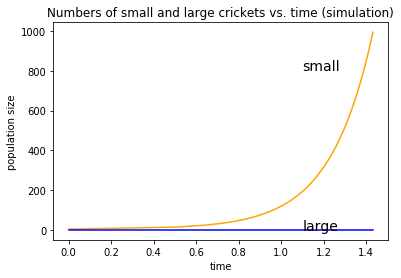

In [12]:
# Stochastic simulation of replicator dynamics for cricket game
# Time is scaled so contact rate of each individual is one per unit time
# The evolution trajectory is stored an plotted

F=np.array([[5,1],[8,3]])  # fitness matrix
n_max=100  # maximum number of interactions
n=np.zeros((n_max,2),dtype=float)
time=np.zeros(n_max,dtype=float)

n[0,0], n[0,1] = 4,0 # initial [number of small crickets, number of large crickets]

for k in range(n_max-1):
    time[k+1]=time[k]+2.0/sum(n[k,:])   # The 2 is here because two individuals make contact at a time
    a=n[k,0]*(n[k,0]-1.0)/((n[k,0]+n[k,1])*(n[k,0]+n[k,1]-1))  # probability both players are type 0
    b=2*n[k,0]*n[k,1]/((n[k,0]+n[k,1])*(n[k,0]+n[k,1]-1.0))  # probability one player of each type
    U=np.random.rand()
    if U<=a:
        n[k+1,:]= n[k,:] + [2*F[0,0],0]
    elif a<U<=a+b:
        n[k+1,:]=n[k,:] + [F[0,1],F[1,0]]
    else:
        n[k+1,:]= n[k,:] + [0,2*F[1,1]]

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.text(1.1,n[80,0], r'small',fontsize=14)
plt.text(1.1,n[80,1], r'large',fontsize=14)
plt.xlabel('time')
plt.ylabel('population size')
plt.title("Numbers of small and large crickets vs. time (simulation)")


The following code computes the deterministic analog of the cricket evolution.  The basic idea is that if the current population is [n[0], n[1]] then the drift (i.e. the expected rate of increase) of n[0] is n[0]  multiplied by the expected number of small crickets generated by a small cricket if an encounter happens.  That is true because each of the existing small crikets is having encounters at expected rate one.   To calculate the mean number of new small crickets generated by the encounter of a small cricket with a randomly selected other cricket, we use the law of total probability.  The encountered cricket is type zero with probabiity n[0]/(n[0]+n[1]), which results in F[0,0] new crickets of type zero, and the encountered cricket is type one with probability n[1]/(n[0]+n[1]), which results in F[0,1] new crickets of type zero.   Combining we get
$$
\dot{n}[0] = n[0]*(F[0,0]*n[0]+F[0,1]*n[1])/(n[0]+n[1])
$$
The equation just derived is based on the law of large numbers (LLN).  If the population is fairly large then no one individual plays a major role in the evolution.  Over a small period of time the ratios of small and large crickets is nearly constant, so the number of new crickets of each type in each time slot are nearly independent and identically distributed.   The LLN suggests approximating the sum of number of individuals of each type by the expected numbers of individuals of each type.  That's how we arrive at a deterministic differential equation.

A similar expression holds for the derivative of n[1], and the two equations can be writen in matrix form as
$$
\dot{n} = diag(n)*F*n/sum(n)
$$
where diag(n) is the diagonal matrix with n[0] and n[1] on the diagonal, and "$*$" represents usual matrix multiplication.   (In the python code below, "$*$" denotes element by element multiplication, which is used instead of creating a diagonal matrix, and np.dot is used for ordinary matrix multiplication.)

Text(0.5,1,'Numbers of small and large crickets vs. time (ode prediction)')

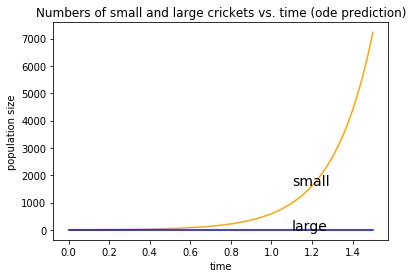

In [13]:
# Deterministic (ODE) replicator dynamics for cricket game
from scipy.integrate import odeint

F=np.array([[5,1],[8,3]])  # fitness matrix

def f(n,t):
    return (n*np.dot(F,n)/sum(n)/1.)

ninit=[4,0]    # initial [number of small crickets, number of large crickets]
time=np.linspace(0.0,1.5, 1000)

n=odeint(f,ninit,time)

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.xlabel('time')
plt.text(1.1,n[800,0], r'small',fontsize=14)
plt.text(1.1,n[800,1], r'large',fontsize=14)
plt.ylabel('population size')
plt.title("Numbers of small and large crickets vs. time (ode prediction)")

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** Run the code above and compare the output to the output of the previous code for stochastic evolutionary dynamics.  Try different intial conditions such as [0,4], [4,0], and [10,1]. Comment on how the result of this compares to our previous simulation. Is the behavior similar?

__Answer__: (Your answer here)
They are roughly same. For the initial conditions which have only one kind of crickets, the results are extremely similar. For the initial condition which both two kinds of crickets are non-zero, the output of the previous code for stochastic evolutionary dynamics has some twists while this one is more smooth.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>** 

If we let $\theta[0]=\frac{n[0]}{n[0]+n[1]}$ and $\theta[1]=\frac{n[1]}{n[0]+n[1]}$ then the vector $\theta=\binom{\theta[0]}{\theta[1]}$ describes the fractions of the popuation of each type.  It's entries sum to one.  Using the chain rule of calculus we can derive the following differential equation for $\theta$ from the above ode for $n$:
$$
\dot{\theta} = diag(\theta) \left( F\theta - \mathbf{1} \theta^T F \theta \right)
$$
where $\mathbf{1}$ is the column vector of ones (the derivation is a bit involved, try deriving it by yourself if interested, but it is not required). The two components of the vector $F \theta$ give the average fitness level of small crickets and large crickets, respectively, in an encounter with a cricket selected randomly from the population.   And $\theta^T F \theta$ is the weighted average of that vector, giving the average fitness over all crickets in the population.   Thus, $\theta[0]$ is increasing exactly when the fitness of small crickets is greater than the average fitness.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>**

1. Modify the above code to integrate the equation for the $\theta$ vector to obtain $\theta$ vs. time.
To check your answer, compare it to what you get by first computing the trajectory of $n$ and then calculating $\theta$ from $n.$  (The code given above for deterministic evolution of n works for any number of types, not just two types. A problem below involves three types of individuals, so it'd be nice if you could implement your code for computing $\theta$ to work for any number of types.) __Be careful when you write your program, since matrix multiplication in Python can be tricky. Understand "$*$" multiplication and np.dot multiplication first. After each small step, debug, confirm, then proceed.__ 
2. Using the fact that $\theta[1]=1-\theta[0],$  a differential equation can be derived for the variable $\theta[0]$ alone.
Plot the function $h$ on the interval $[0,1]$ such that $\dot{\theta}[0]=h(\theta[0]).$ Note that the horizontal axis of the graph is $\theta$, the vertical axis is $\dot{\theta}$. (You can just do this
numerically.  It can also be done algebrically; in fact $h$ is a cubic polynomial, but it is a bit complicated to find the polynomial.)
3. What are the zeroes of $h$ (those are the equilibrium points of $\theta[0]$)?  Which of those are stable (in the sense that if $\theta[0]$ is slightly moved away from the equilibrium point, it returns to the equilibrium point)?

Text(0.5,1,'Numbers of small and large crickets vs. time (ode prediction)')

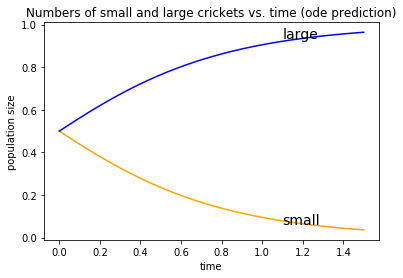

In [19]:
# for part 1
# Deterministic (ODE) replicator dynamics for cricket game
from scipy.integrate import odeint

F=np.array([[5,1],[8,3]])  # fitness matrix

def f(th,t):
    fth = np.dot(F, th)
    oneth = np.array([[th[0],th[1]],[th[0],th[1]]])
    return th*(fth - np.dot(oneth, fth))
ninit=[4,4]    # initial [number of small crickets, number of large crickets]
thinit = [ninit[0]/sum(ninit), ninit[1]/sum(ninit)]
time=np.linspace(0.0,1.5, 1000)

n=odeint(f,thinit,time)

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.xlabel('time')
plt.text(1.1,n[800,0], r'small',fontsize=14)
plt.text(1.1,n[800,1], r'large',fontsize=14)
plt.ylabel('fraction')
plt.title("fraction of small and large crickets vs. time (ode prediction)"

Text(0,0.5,'derivative of theta')

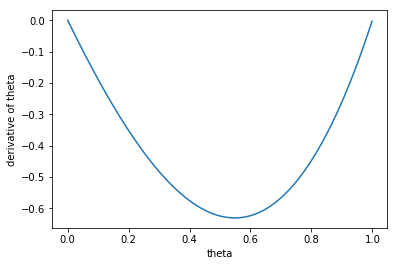

In [24]:
#for part 2
from scipy.integrate import odeint

F=np.array([[5,1],[8,3]])  # fitness matrix

def f(th):
    fth = np.dot(F, th)
    oneth = np.array([[th[0],th[1]],[th[0],th[1]]])
    return th*(fth - np.dot(oneth, fth))
th0 = 0
lth0 = []
ldth0 = []
while th0 <= 1:
    thinit = [th0, 1-th0]
    lth0.append(th0)
    ldth0.append(f(thinit)[0])
    th0 += 0.001
plt.plot(lth0, ldth0)

plt.xlabel('theta')
plt.ylabel('derivative of theta')


__Answer:__ (Your answer here)
<li> for part 3<li>
    theta = 0 and theta = 1 are the zeros of h. But only theta = 0 is stable.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>** 

The overall behavior in evolutionary games depends heavily on the fitness matrix $F.$   Another choice of $F$ corresponds to the so-called doves and hawks evolution game, for which the fitness matrix is
$$\begin{array}{c|cc}  & dove & hawk  \\ \hline
    dove & 3 & 1  \\
    hawk & 5 & 0
    \end{array}$$
or by a fitness matrix
$$F=\left( \begin{array}{cc}  3 & 1 \\ 5 & 0  \end{array}\right).$$   Think of the doves and hawks as two types of birds that need to share resources, such as food.  (The hawks are so aggressive that they attack the doves).  A dove has higher fitness, 3, against another dove than against a hawk, 1.  A hawk has a high fitness against a dove (5) but zero fitness against another hawk, because the hawks fight over their resources.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 5:</SPAN>** 

1. Repeat the deterministic (ode) approach above, but now for the doves and hawks evolution game.   You can use either the random or deterministic evolution equations for the numerical analysis.   
2. Comment and verify your assertions about equilibrium behavior by finding a differential equation for $\theta[0]$ and exploring its equilbrium points and their stability.

Text(0.5,1,'Numbers of foves and hawks vs. time (ode prediction)')

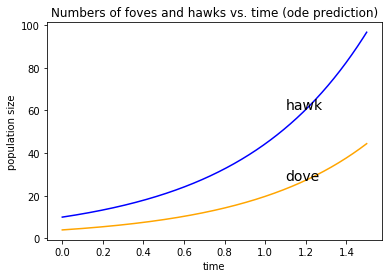

In [29]:
# For part 1
from scipy.integrate import odeint

F=np.array([[3,1],[5,0]])  # fitness matrix

def f(n,t):
    return (n*np.dot(F,n)/sum(n)/1.)

ninit=[4,10]    # initial [number of small crickets, number of large crickets]
time=np.linspace(0.0,1.5, 1000)

n=odeint(f,ninit,time)

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.xlabel('time')
plt.text(1.1,n[800,0], r'dove',fontsize=14)
plt.text(1.1,n[800,1], r'hawk',fontsize=14)
plt.ylabel('population size')
plt.title("Numbers of foves and hawks vs. time (ode prediction)")

Text(0,0.5,'derivative of theta')

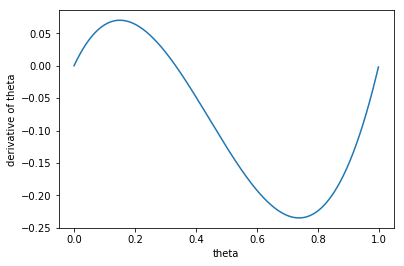

In [69]:
#for part 2
from scipy.integrate import odeint

F=np.array([[3,1],[5,0]])  # fitness matrix

def f(th):
    fth = np.dot(F, th)
    oneth = np.array([[th[0],th[1]],[th[0],th[1]]])
    return th*(fth - np.dot(oneth, fth))
th0 = 0
lth0 = []
ldth0 = []
while th0 <= 1:
    thinit = [th0, 1-th0]
    lth0.append(th0)
    ldth0.append(f(thinit)[0])
    th0 += 0.001
plt.plot(lth0, ldth0)

plt.xlabel('theta')
plt.ylabel('derivative of theta')


__Answer__: (Your answer here)
<li>part 2<li>
    there are three equilbrium points: theta = 0, aroud 1/3, 1. But only the point theta around 1/3 is a stable one.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 5</SPAN>** 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 6:</SPAN>**  Find a 3x3 fitness matrix $F$ and an initial condition for an evolutionary game with three types of individuals such that the solution $\theta$ has a limit cycle, not just converging to a limit point.  Does the limit cycle depend on the intial state for your fitness matrix?  

Hint 1: Adapt the code you wrote for Problem 4.

Hint 2: Solve this problem by trial and error, i.e. trying different values of the entries in the fitness matrix. Think of the three types of individuals as three kinds of animals. What kind of relationship among these three animals would likely to cause an oscillating population for each animal?

Text(0.5,1,'fraction of eleghants, tigers and mice vs. time (ode prediction)')

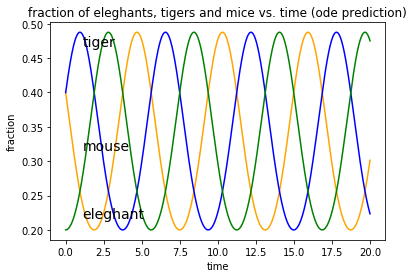

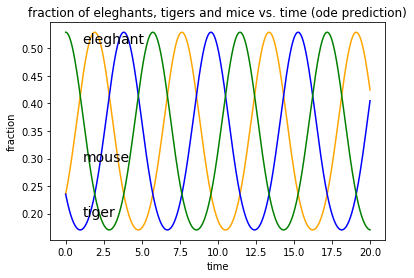

In [68]:
# Your code here
from scipy.integrate import odeint
F=np.array([[3,1,5],
            [5,3,1],
            [1,5,3]])

def f(th,t):
    fth = np.dot(F, th)
    oneth = np.array([[th[0],th[1],th[2]],[th[0],th[1],th[2]],[th[0],th[1],th[2]]])
    return th*(fth - np.dot(oneth, fth))
ninit=[4,4,2]    # initial [number of small crickets, number of large crickets]
thinit = [ninit[0]/sum(ninit), ninit[1]/sum(ninit), ninit[2]/sum(ninit)]
time=np.linspace(0.0,20, 2000)

n=odeint(f,thinit,time)

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.plot(time,n[:,2],'green')
plt.xlabel('time')
plt.text(1.1,n[800,0], r'eleghant',fontsize=14)
plt.text(1.1,n[800,1], r'mouse',fontsize=14)
plt.text(1.1,n[800,2], r'tiger',fontsize=14)
plt.ylabel('fraction')
plt.title("fraction of eleghants, tigers and mice vs. time (ode prediction)")

plt.figure()

ninit=[4,4,9]    # initial [number of small crickets, number of large crickets]
thinit = [ninit[0]/sum(ninit), ninit[1]/sum(ninit), ninit[2]/sum(ninit)]
time=np.linspace(0.0,20, 2000)

n=odeint(f,thinit,time)

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.plot(time,n[:,2],'green')
plt.xlabel('time')
plt.text(1.1,n[800,0], r'eleghant',fontsize=14)
plt.text(1.1,n[800,1], r'mouse',fontsize=14)
plt.text(1.1,n[800,2], r'tiger',fontsize=14)
plt.ylabel('fraction')
plt.title("fraction of eleghants, tigers and mice vs. time (ode prediction)")

__Answer__: (Your answer here)
   The F is:[3 1 5] [5 3 1] [1 5 3] <li> The three animals are elephants, tigers and mice. Elephants trample tigers, tigers kill mice, mice harass eleghpants.
    Yes, it does not depend on the initial situation for most situation. The two figure above are with initial states: [4 4 2] and [4 4 9].<li>
   But if the initial states with one or some zeros, that will influence the results.
   <li> zero amount initial states will lead to one of the animals' fraction become 1, and other two become zero.
        

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 6</SPAN>** 

For this week's lab, please answer all questions 1-6.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 